# Grid search
* This is a quick introduction to grid searching
* Need to sweep across parameters (and methods)
* Perform many cross validations for each parameter set
* Average across cross validations
* All built into Scikit learn

In [1]:
%matplotlib inline
# import helper tools
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

### Define noisy cubic for data generation

In [2]:
# define a nice cubic function with some noise
# N = nummber of points
# noise = Gaussian noise std
def cubicData(N,noise):
    X = np.random.uniform(size=(N,1),low=-5.,high=5.)
    addNoise = noise*np.random.standard_normal(size=N)
    y = -(X[:,0]+7.)**2. + X[:,0]**3.+addNoise
    return X,y

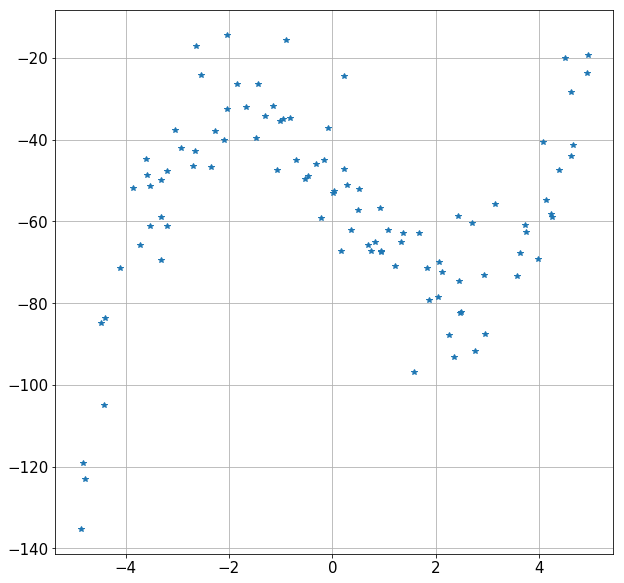

In [3]:
# Generate and plot data set
X,y = cubicData(100,10.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
# set plotting params.
width = 10
height = 10
plt.figure(figsize=(width, height))
plt.rcParams.update({'font.size':15})
plt.plot(X[:,0],y,'*')
plt.grid()

### Plot Kernel ridge with arbitrary tuning parameters

0.7966829798093682
0.7239969705058861


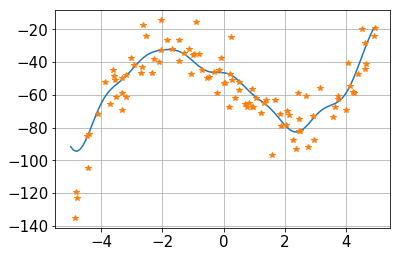

In [4]:
# Kernel Ridge with Radial Basis functions
nlreg = KernelRidge(alpha=0.25,kernel='rbf',gamma=1.)
# fit the model using the training data and training targets:
nlreg.fit(X_train, y_train)

# Kernel Ridge with Radial Basis functions
nlreg = KernelRidge(alpha=0.25,kernel='rbf',gamma=1.)
# fit the model using the training data and training targets:
nlreg.fit(X_train, y_train)
# print train/test scores (R-squared)
print(nlreg.score(X_train,y_train))
print(nlreg.score(X_test,y_test))


xplot = np.arange(start=-5., stop=5.,step=0.1)
# This is tricky.  Need to convert it to a Nx1 matrix for scikit learn
xplot = np.reshape(xplot,(len(xplot),1))
# Generate forecastand plot
yfit = nlreg.predict(xplot)
plt.plot(xplot,yfit)
plt.plot(X,y,'*')
plt.grid()


### Grid Search

In [7]:
# Now set up a grid search over parameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import pandas as pd
# You can use many different objectives
# score_used = 'neg_mean_squared_error'
# score_used = 'neg_mean_absolute_error'
score_used = 'r2' 
# set up dictionary for grid search
param_grid={'alpha':[0.005,0.05,0.1,0.2, 0.3, 0.5,1.],'gamma':[0.1,0.2,0.5,1.0,2.0],'kernel':['rbf']}
# set up cross-validation shuffles
shuffle_split = ShuffleSplit(test_size=0.2, train_size=0.8, n_splits=25)
# set up search
grid_search=GridSearchCV(KernelRidge(),param_grid,cv=shuffle_split,scoring=score_used, 
                              return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_alpha','param_gamma']])

    rank_test_score  mean_test_score param_alpha param_gamma
0                 1         0.743881       0.005         0.1
1                 2         0.740274       0.005         0.2
2                14         0.714929       0.005         0.5
3                26         0.686025       0.005           1
4                32         0.634136       0.005           2
5                 3         0.739860        0.05         0.1
6                 5         0.733726        0.05         0.2
7                 6         0.729822        0.05         0.5
8                18         0.708755        0.05           1
9                28         0.678456        0.05           2
10                4         0.733789         0.1         0.1
11                8         0.729077         0.1         0.2
12                7         0.729159         0.1         0.5
13               13         0.715086         0.1           1
14               24         0.687122         0.1           2
15               11     

0.7935358082947731
0.7987107128524265


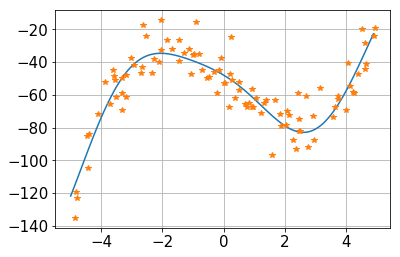

In [6]:
# Try a plot on optimal parameters
nlreg = KernelRidge(alpha=0.005,kernel='rbf',gamma=0.1)
# fit the model using the training data and training targets:
nlreg.fit(X_train, y_train)
# print train/test scores (R-squared)
print(nlreg.score(X_train,y_train))
print(nlreg.score(X_test,y_test))


xplot = np.arange(start=-5., stop=5.,step=0.1)
# This is tricky.  Need to convert it to a Nx1 matrix for scikit learn
xplot = np.reshape(xplot,(len(xplot),1))
# Generate forecastand plot
yfit = nlreg.predict(xplot)
plt.plot(xplot,yfit)
plt.plot(X,y,'*')
plt.grid()